# Spatial, spectral, and temporal resolutions

* **Special requirements:** A Google account, access to Google Earth Engine.
* **Prerequisites:** You should have completed the "2.1_ENGN3903_Satellite images and bands", the "2ENGN3903_Images, collections, and filters" notebook.


## Background

(Refer to Lecture 2 of week 2)

Resolution is the ability to discriminate information in an image. The discrimination of information refers not only to the spatial detail (spatial resolution) but also to the number of spectral waveband, their bandwidths and spectral covered (spectral resolution), the temporal frequency of observations (temporal resolution) and the signal to noise ration or its ability to distinguish vitiations in the energy detected (radiomatric resolution). One may also have consideration the sensor potential  to acquire information at different viewing angles (angular resolution) or polarization channels (polimetric resolution)


## Aims of the practical session

This practical has three aims:
1. to understand the differences between the spatial, spectral, and temporal resolutions of different satellite sensors.
1. to plot the spectral signature of different land cover types, and
1. to calculate different spectral indices.


***

## Description

In this notebook we'll load images from 3 different sensors and will use them to understand the differences between the spatial, spectral and temporal resolution in the remote sensing context. 

First we will:
- Load Landsat, Sentinel 2, and MODIS images for the Canberra region.

Then we will:
- visualize the images of the different sensors side-by-side to understand the concept of spatial resolution;
- list the number of images collected in a two-month period and compare the three sensors to understand the concept of temporal resolution;

Afterwards we will:
- calculate and compare different spectral indices.

<div class="alert alert-block alert-warning">
<b>Assessment:</b> Once you finish the practical and the excercises, remember to submit your notebook through Wattle by Sunday.
Challenges are optional and will not be part of the assessment.
</div>

***

## Getting started


### Load packages

Import Python packages that are used for the analysis.


In [1]:
# %matplotlib inline

import geemap as gmap
import os
import ee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Connect to Google Earth Engine (GEE)

Connect to the GEE so we can access GEE datasets and computing assets.
You may be required to input your Google account name and password. Please keep those safe and don't share them with anyone.

In [2]:
m = gmap.Map()

***

## Comparing the spatial resolution of different sensors.

Load the Landsat 8 and Sentinel 2 image collections that intersect the ACT and visualize them in a map

In [3]:
# First, let's create a polygon around the ACT
act = ee.Geometry.Polygon([[148.7392751586051,-36.011462319908816],
   [149.8598806273551,-36.011462319908816],
   [149.8598806273551,-35.1087997777942],
   [148.7392751586051,-35.1087997777942],
   [148.7392751586051,-36.011462319908816]])

# Let's add the polygon to the map
Map = gmap.Map(center=[-35.2041, 149.2721], zoom=10)
Map.addLayer(act,{},'act')

In [4]:
# Now let's add the image collections.
s2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
modis = ee.ImageCollection("MODIS/061/MYD09A1").select([
    'sur_refl_b01',
    'sur_refl_b02',
    'sur_refl_b03',
    'sur_refl_b04',
    'sur_refl_b05',
    'sur_refl_b06',
    'sur_refl_b07'])

# Filter the image collections by date, and by location.
s2 = s2.filterDate('2019-02', '2019-04').filterBounds(act).median()
modis = modis.filterDate('2019-02', '2019-04').filterBounds(act).median()

# Lastly, let's give some visualization paramaters to each collection.
s2VisParam = {'bands': ["B4","B3","B2"],
              'max': 2700,
              'min': 0}

# Note that the visualization are different for each image collection.
modisVisParams = {'bands': ["sur_refl_b01","sur_refl_b04","sur_refl_b03"],
              'max': 2100,
              'min': 0}
              
Map.addLayer(s2, s2VisParam, 's2')
Map.addLayer(modis, modisVisParams, 'modis')
# Map.addLayer(act,{},'ACT')

Map

Map(center=[-35.2041, 149.2721], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

### <a name="ex1"></a> Exercise 1 - add the Landsat 8 image collection to the map.

You've done this before, just make sure you filter the image collection with the same dates as the ones above. 


In [5]:
# Your code goes here


<a href="#ex1answer">Answer to Exercise 1</a>

### <a name="ex1"></a> Exercise 2 - Understanding spatial resolution.


<div class="alert alert-block alert-danger">

**Answer the following questions:**

1) What is the smallest feature you can identify using the MODIS, Landsat, and Sentinel 2 imagery?
    
2) Which satellite sensor has the best and worst spatial resolution.

</div>    

Try identifying the following features / places / landmarks:
>- Telstra Tower
>- a car
>- a football/cricket field
>- Canberra Airport
>- Lake George,
>- a crop field
>- a mountain range or a large forest.



Your answer goes here:

.

***

## Comparing the spectral resolution of different sensors

There are few hyperspectral sensors in orbit.

Fortunately, we have access to [Hyperion](https://www.usgs.gov/centers/eros/science/earth-observing-1-eo-1) data. Hyperion was a hyperspectral sensor that was Decommissioned in 2017, but gathered data in many places around the globe.

As with the other sensors, we can add these data to our map, and filter by date and location.


<div class="alert alert-block alert-danger"> 
    
**caution**
Because Hyperion only provides irradiance data, we might have to
1) either perform atmospheric correction, or
2) load TOA Landsat data and uncorrected MODIS
so the plots are comparable
<div>

In [6]:
Map2 = gmap.Map(center=[-35.2041, 149.2721], zoom=8)

# Geth the Hyperion image collection and a Landsat image to display
hyper = ee.ImageCollection("EO1/HYPERION").filterBounds(act).median()

clearC2 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_090085_20210118') \
        .select(['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7',])

# Set the visualization parameters for the images we're going to display
hyperVisParams = {'bands': ["B035","B023","B015"],
                 'max':6000,
                 'min':500}

landsatC2_vis = {'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
              'min': 7000,
              'max': 27000}

# Add the layers to the map
Map2.addLayer(modis, modisVisParams, 'MODIS image collection')
Map2.addLayer(clearC2, landsatC2_vis,' Landsat image')
Map2.addLayer(hyper, hyperVisParams, 'Hyperion hyperspectral image collection')

Map2.set_plot_options(add_marker_cluster=True)
Map2

Map(center=[-35.2041, 149.2721], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

### <a name="ex3"></a> Exercise 3 - Understanding the spectral resolution.


<div class="alert alert-block alert-danger">

**Compare and contrast:**

1) The spatial *coverage* of the MODIS data, versus the Hyperion data
    
2) The spectral resolution of the MODIS, Landsat, and Hyperion images.

</div>    


## Displaying the spectral signatures of different land covers

Now click on the map toolbar and select the 'Plotting' icon as shown below. Pay atention to the image selected for this excercise. If you add more data to the map, you'll need to select the image you want to explore.
![3.1_fig3.PNG](NYC_draftsAndResources/3.1_fig3.PNG)

Now click anywhere on the image and look at the spectral signature of the selected feature. Is it what you would expect?

In [7]:
Map3 = gmap.Map(center=[-35.9659, 149.4965], zoom=8)

# Geth  a Landsat image to display
clearC2 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_090085_20210118') \
        .select(['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7',])

# Add the layers to the map
Map3.addLayer(clearC2, landsatC2_vis,' Landsat image')

Map3.set_plot_options(add_marker_cluster=True)
Map3

Map(center=[-35.9659, 149.4965], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

<div class="alert alert-block alert-danger"> 
    
**caution**

the spectral signatures of water look weird. 
    might have to use a different image.
<div>

Now we can export these points and the corresponding band values to a CSV and Shapefile to use them in another software (e.g. QGIS) if we wanted to.

In [8]:
# Change the path to the 'Downloads' folder in your computer
folder = 'C:/User/Downloads/'
points_shp = os.path.join(folder, 'points.shp')
Map3.extract_values_to_points(os.path.join(folder, 'points4.shp'))

For us it is important to know the values of each band for each of the points/features we just created and we want to compare them.

   
To dot his, we need to:
1. Click on the map tools icon (the little wrench), and select 'Collect Training samples'.
1. A table will appear. Fill the 'Required Property' with `landCover`, and the 'Integer Value' with `1`.
1. Then fill the 'Optional Property' with `label`, and the 'String Value' with `water`. Click `Apply` and collect 4-10 points over water bodies in the image using the 'Draw a Marker' tool on the left hand side of the map.
1. Having done this, change the 'Integer Value' to `2`, and the 'String Value` with `forest`. Click `Apply` and collect 4-10 points over forests.
1. continue until you have collected data for at least three different land covers (e.g. forest, clouds, water, bare soil)
    
![collectPts](NYC_draftsAndResources/3.1_fig4_collectPts2.JPG)

In [33]:
Map4 = gmap.Map(center=[-35.9659, 149.4965], zoom=8)

# Geth  a Landsat image to display
clearC2 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_090085_20210118') \
        .select(['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7',])

# Add the layers to the map
Map4.addLayer(modis, modisVisParams, 'MODIS image collection')
Map4.addLayer(clearC2, landsatC2_vis,' Landsat image')

Map4.set_plot_options(add_marker_cluster=True)
Map4

Map(center=[-35.9659, 149.4965], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

In [34]:
pointsLandsat = clearC2.sampleRegions(**
                               {'collection': Map4.user_rois,
                                'scale': 30,
                                'geometries': True,
                               'tileScale': 8}
                               )
pointsLandsat

In [35]:
# Now let's do the same with the MODIS images
pointsModis = modis.sampleRegions(**
                               {'collection': Map4.user_rois,
                                'scale': 500,
                                'geometries': True,
                               'tileScale': 8}
                               )
pointsModis

In [36]:
# Add all the points/polygons to the map
Map4.addLayer(pointsLandsat,{'color':'red'},'point samples')

<div class="alert alert-block alert-warning">
If you get an error like this one:
    `EEException: Parameter 'collection' is required.`
it means that you have not gathered the points. Go back to Map4, collect the training points and try again.
</div>

Now each point has the values for each Landsat band (pointsLandsat), and each MODIS band (pointsModis)

In [37]:
# We can export the points with the band valuesto a 'dataframe' (a table)
df_landsat = gmap.ee_to_pandas(pointsLandsat, verbose=True)

# Now we'll sort the 'label' column to make the figure below look a bit better.
# Here we're assuming that you named the 'Optional Property' as 'label'
df_landsat = df_landsat.sort_values(by = ['label'])
print(df_landsat.head(3))

# And we can export the points with the band values to a 'geo dataframe' (a geospatial table)
# gdf = gmap.ee_to_geopandas(pointsLandsat, verbose=True)
# print(gdf.head(3))


     color label  landCover  SR_B1  SR_B2  SR_B3  SR_B4  SR_B5  SR_B6  SR_B7
6  #3388ff  land          2   8389   8711   9416   9898  14803  15802  12755
7  #3388ff  land          2   8358   8488   9402   9049  19411  14307  11286
8  #3388ff  land          2   8377   8539   9064   9466  13538  14629  12600


<div class="alert alert-block alert-warning">
Did you get a `KeyError: 'label'`?
    
If so, double check if you named the 'Optional Property' as 'label', of if you used a different name. Change the code in the cell above to reflect the optional property you chose.
If you didn't get the error, you can ignore this message.
</div>

In [38]:
# you can see the deatils of every feature (in this case every point) by using the 'getInfo()' method.
pointsLandsat.getInfo()

{'type': 'FeatureCollection',
 'columns': {},
 'properties': {'band_order': ['SR_B1',
   'SR_B2',
   'SR_B3',
   'SR_B4',
   'SR_B5',
   'SR_B6',
   'SR_B7']},
 'features': [{'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Point',
    'coordinates': [150.45527404950445, -35.64926660796996]},
   'id': '0_0',
   'properties': {'SR_B1': 7389,
    'SR_B2': 7501,
    'SR_B3': 7549,
    'SR_B4': 7330,
    'SR_B5': 7517,
    'SR_B6': 8012,
    'SR_B7': 8042,
    'color': '#3388ff',
    'label': 'water',
    'landCover': 1}},
  {'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Point',
    'coordinates': [150.32897807934228, -36.02779083717511]},
   'id': '1_0',
   'properties': {'SR_B1': 7384,
    'SR_B2': 7529,
    'SR_B3': 7635,
    'SR_B4': 7417,
    'SR_B5': 7594,
    'SR_B6': 8067,
    'SR_B7': 8097,
    'color': '#3388ff',
    'label': 'water',
    'landCover': 1}},
  {'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Point',
    'coo

In [39]:
# We can export the points with the band valuesto a 'dataframe' (a table)
df_modis = gmap.ee_to_pandas(pointsModis, verbose=True)

# Now we'll sort the 'label' column to make the figure below look a bit better.
df_modis = df_modis.sort_values(by = ['label'])

# and we re-oder the columns. See https://lpdaac.usgs.gov/products/myd09a1v061/ to understand the order.
modisColumnOrder = ['sur_refl_b03','sur_refl_b04','sur_refl_b01','sur_refl_b02',
 'sur_refl_b05','sur_refl_b06','sur_refl_b07','color', 'lc', 'label',]
df_modis = df_modis[modisColumnOrder]

print(df_modis.head())

# And we can export the points with the band values to a 'geo dataframe' (a geospatial table)
# gdf_modis = gmap.ee_to_geopandas(pointsModis, verbose=True)
# print(gdf_modis.head(3))


KeyError: "['lc'] not in index"

***

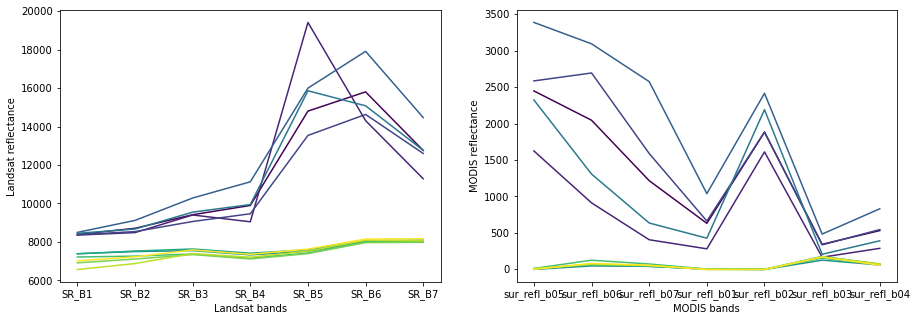

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))

modisLabels = df_modis['label'].to_list()
landsatLabels = df_landsat['label'].to_list()

colors = plt.cm.viridis(np.linspace(0, 1, max(len(modisLabels), len(landsatLabels))))

n=0

# We plot the data on each row independently
for index, row in df_modis.drop(['color','landCover','label'], axis=1).iterrows():
    axes[1].plot(row, label=modisLabels[n], color=colors[n] )
    n +=1

n=0
for index, row in df_landsat.drop(['color','landCover','label'], axis=1).iterrows():
    axes[0].plot(row, label=landsatLabels[n] , color=colors[n] )
    n +=1    
    
# Set the lables for the axes    
axes[0].set_ylabel('Landsat reflectance')
axes[1].set_ylabel('MODIS reflectance')
axes[0].set_xlabel('Landsat bands')
axes[1].set_xlabel('MODIS bands')

plt.show()

In [43]:
Map5 = gmap.Map(center=[-35.9659, 149.4965], zoom=8)

# Geth  a Landsat image to display
clearC2 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_090085_20210118') \
        .select(['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7',])

# Add the layers to the map
Map5.addLayer(clearC2, landsatC2_vis,' Landsat image')
Map5.addLayer(hyper, hyperVisParams, 'Hyperion hyperspectral image collection')

Map5.set_plot_options(add_marker_cluster=True)
Map5

Map(center=[-35.9659, 149.4965], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

In [ ]:
pointsHyperion = hyper.sampleRegions(**
                               {'collection': Map5.user_rois,
                                'scale': 30,
                                'geometries': True,
                               'tileScale': 8}
                               )
pointsHyperion

In [ ]:
# Add all the points/polygons to the map
Map5.addLayer(pointsHyperion,{},'hyperion point samples')

Now each point has the values for each Landsat band (pointsLandsat), and each MODIS band (pointsModis)

In [ ]:
# We can export the points with the band valuesto a 'dataframe' (a table)
df_hyperion = gmap.ee_to_pandas(pointsHyperion, verbose=True)

# Now we'll sort the 'label' column to make the figure below look a bit better. 
df_hyperion = df_hyperion.sort_values(by = ['label'])
print(df_hyperion.head(3))


Now each point has the values for each Hyperion band (pointsHyperion), however plotting the ~190 bands of Hyperion is a challenge. So we need to make some adjustments to the plot.

In [ ]:
# First, we create a list of the column names. In this case, each column name is the name of each spectral band.
hyperColNames = df_hyperion.drop(['color','lc','label'], axis=1).columns.to_list()
# print(hyperColNames)

# and sort the band names from 
hyperColNames.sort()

# and select every 3rd band for the plot
bandLabels = hyperColNames[::3]
# print(bandLabels)

In [ ]:
fig, axes = plt.subplot_mosaic(
    [['a)', 'b)'], 
     ['c)', 'c)'],
], constrained_layout=True, figsize=(15,7))


# We plot the data on each row independently
for index, row in df_modis.drop(['color','landCover','label'], axis=1).iterrows():
    axes['a)'].plot(row, color='grey' )
    n +=1

n=0
for index, row in df_landsat.drop(['color','landCover','label'], axis=1).iterrows():
    axes['b)'].plot(row, color='grey'  )
    n +=1    

n=0
for index, row in df_hyperion.drop(['color','landCover','label'], axis=1).sort_index(axis=1).iterrows():
    axes['c)'].plot(row, color='grey' , alpha=0.5 )
    n +=1 

    # Set the lables for the axes    
axes['a)'].set_ylabel('Landsat reflectance')
axes['b)'].set_ylabel('MODIS reflectance')
axes['c)'].set_ylabel('Hyperion radiance')
axes['a)'].set_xlabel('Landsat bands')
axes['b)'].set_xlabel('MODIS bands')
axes['c)'].set_xlabel('Hyperion bands')
axes['a)'].set_title('Landsat data')
axes['b)'].set_title('Modis data')
axes['c)'].set_title('Hyperion data')
plt.xticks(bandLabels, labels = bandLabels, rotation=45, fontsize=10)
plt.show()


***

## Calculating spectral indices

Now that we know what is the spectral resolution of each sensor, we can start doing some analysis with these data.

One of the ways of analysing satellite imagery is by using each spectral band and doing some mathematics on them. To learn more, see Lecture 2 Week 2 adn we will cover more of these during hte lectures in week 4.

For normalized indices in the form of 

$$Index = \frac{(Band 1 - Band 2)}{(Band 1 + Banb 2)} $$

The calculation is straightforward, as shown below

In [ ]:
# Compute Normalized Difference Vegetation Index over MOD09GA product.
# NDVI = (NIR - RED) / (NIR + RED), where
# RED is sur_refl_b01, 620-670nm
# NIR is sur_refl_b02, 841-876nm

# You can Load a Landsat image, or you can use the same as above.
# clearC2 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_090085_20210118')

# Use the normalizedDifference(A, B) to compute (A - B) / (A + B)

ndviLandsat = clearC2.normalizedDifference(['SR_B5','SR_B4'])

# Make a palette: a list of hex strings.
indexPalette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']

Map6 = gmap.Map(center=[-35.9659, 149.4965], zoom=8)


# Add the layers to the map
Map6.addLayer(clearC2, landsatC2_vis,' Landsat image')
Map6.addLayer(ndviLandsat, {'min': -0.2, 'max': 1, 'palette': indexPalette}, 'ndviLandsat')

Map6

<div class="alert alert-block alert-danger"> 

**Answer the following questions**   

1. Which features have the *highest* NDVI values? why?
1. Which features have the *lowest* NDVI values? why?

<div>

### <a name="ex4"></a> Exercise 4 - Computing other vegetation indices

<div class="alert alert-block alert-danger">

**Your turn to code:**

1) Use the same landsat image as abovo to calculate the Normalized Difference Water Index (NDWI)
    
$$NDWI= \frac{(NIR - SWIR)}{(NIR + SWIR)} $$



2) Calculate the NDVI and NDWI on the MODIS, and Hyperion images and comment on the differences

</div>    

In [ ]:
# Your code goes here



But not all spectral indices have the same formula.

For example, the [Enhanced Vegetation Index (EVI)](https://doi.org/10.1016/S0034-4257(02)00096-2) is widely used to detect vegetation, and has the following formula:

$$EVI= G x \frac{(NIR - Red)}{(NIR + C1 x Red - C2 x Blue +L)} $$

Where: 
- NIR/red/blue are the surface reflectance values of the said bands,
- L is the canopy background adjustment that addresses non-linear, differential NIR and red radiant transfer through a canopy, and
- C1, C2 are the coefficients of the aerosol resistance term, which uses the blue band to correct for aerosol influences in the red band.
Common values for the coeficcients are: L=1, C1 = 6, C2 = 7.5, and G (gain factor) = 2.5. 

For these types of indices, and other mathematical operations in Google Earth Engine we have to create an `expression`, as shown below:

In [ ]:
# Compute EVI using an expression.  The second argument is a map from
# variable name to band name in the input image.
evi = modis.expression(
    '2.5 * (nir - red) / (nir + 6 * red - 7.5 * blue + 1)',
    {
        'red': modis.select('sur_refl_b01'),    # 620-670nm, RED
        'nir': modis.select('sur_refl_b02'),    # 841-876nm, NIR
        'blue': modis.select('sur_refl_b03')    # 459-479nm, BLUE
    })


# Display the input image and the EVI computed from it.
Map6.addLayer(modis, modisVisParams, 'MODIS image collection')
Map6.addLayer(evi, {'min': 0, 'max': 2, 'palette':indexPalette}, 'EVI')
Map6

### <a name="ex5"></a> Exercise 5 - Other spectral indices.

There's another spectral index used to detect ferrous oxides.

Where in Australia would you expect to see high levels of ferrous oxides?

<div class="alert alert-block alert-danger">

**Your turn to code:** on the Landsat and MODIS images

[Ferric iron, Fe2+ Index ](https://www.indexdatabase.de/db/i-single.php?id=18) 

$$Fe2 Index= \frac{(2145:2185 nm)}{(760:860 nm)} + \frac{(520:600 nm)}{(630:690 nm)} $$

    
**Challenge:**

Calculate the [Normalized Difference Lignin Index](https://www.indexdatabase.de/db/i-single.php?id=55) using Hyperion images across Australia.

    
</div>    

***

## Summary

In this notebook you have learned about:
- how different sensors have different spatial and spectral resolutions. These **will** affect your analysis, so you'll have to understand which sensor is better for which analysis.
- Creating different spectral indices. Specifically, you created 'normalized difference' indices and indices that have more complex formulas.
- Finally, you learned how to apply these indices to different data.

***

## References and useful readings
<div class="alert alert-block alert-danger">
    
**update**
    
- See recomended readings for week 2 in wattle
- https://geemap.org/
- http://dx.doi.org/10.1016/j.rse.2015.11.032
- https://doi.org/10.3390/rs1030184
- https://doi.org/10.1016/j.rse.2014.02.001
    </div>

***

## Additional information

**Sources:** 

**License:** The code in this notebook is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/). 

**Contact:** If you need assistance, please post a question on the ENGN3903 Wattle (**check**) site 

**Last modified:** May 2022

***

## Exercise answers

<a name="ex1answer">Answer to Exercise 1</a>

In [ ]:
l8 = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")

l8 = l8.filterDate('2019-02', '2019-04').filterBounds(act).median()

l8VisParams = {'bands': ["SR_B4","SR_B3","SR_B2"], 
               'max': 23901,
               'min': 7320}

Map.addLayer(l8, l8VisParams, 'l8')

Map

<a name="ex4answer">Answer to Exercise 4</a>

<a name="ex5answer">Answer to Exercise 5</a>

In [ ]:
ferrousOxides = modis.expression(
    'swir1 / nir',
    {
        'nir': modis.select('sur_refl_b02'),    # 841-876nm, NIR
        'swir1': modis.select('sur_refl_b06')    # 1628-1652nm, SWIR1
    })

vis_params = {'palette': ['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c'],'min': 0, 'max': 2.7,}

Map.addLayer(ferrousOxides, vis_params, 'ferrousOxides')
Map